In [178]:
# Data preprocessing : integrate three different sources into one tsv.
import pandas as pd 
tsv1 = pd.read_csv('../data/arcgis_img_captions_objects_final2.tsv',sep='\t') 
geo = pd.read_csv('../data/geotopic.csv')

#tsv2_geo = pd.concat([tsv1, geo],axis=1) 
tsv2_geo = tsv1.merge(geo, how='left', on=['city','country','location','description','state','state_abbrev','longitude','latitude','city_longitude','city_latitude','date_occured'])
print(tsv2_geo.shape)

spacy_df = pd.read_csv('../data/ner_results_v2.tsv',sep='\t')
tsv2_final = tsv2_geo.merge(spacy_df, how='left',on=['city','country','location','description','state','state_abbrev','longitude','latitude','city_longitude','city_latitude'])
print(tsv2_final.shape) 

(9735, 39)
(9743, 57)


In [179]:
tsv2_final.columns = ['city','country','description','location','state','state_abbrev','longitude','latitude','city_longitude','city_latitude','date_occured',
                      'Audio','Visual','Time_of_Day','Apparition_Type','Event_Type','witness_count', 'total_deaths', '%_under_21',
                      'daylight_minutes','daylight_diff','geometry','buffer_10_miles','schools_within_10_miles','distance_to_nearest_school_km',
                      'is_haunted_place_a_school','Avg_PRCP','Avg_SNWD','DiurnalTemperatureRange', 'intrastate_gaspipe_within_10miles','interstate_gaspipe_within_10miles',
                      'mental_health_providers','mental_health_RGB','IMG_LOC','caption','objects','geo_name','geo_lat','geo_lon',
                      'GPE','PERSON','CARDINAL','LANGUAGE','PERCENT','ORDINAL','FAC','WORK_OF_ART','LAW','PRODUCT','NORP','MONEY','EVENT','TIME','ORG','DATE','QUANTITY','LOC']
#tsv2_final.to_csv('../data/tsv2_final.tsv', sep='\t',index=False)  

# Analysis 

Part1. Analysis around GeoTopicParser

Part2. Analysis around Spacy

Part3. Analysis around AI image

Part4. Comprehensive Analysis  

## Part 1. 

In [180]:
tsv2_geo = pd.read_csv('../data/tsv2_final.tsv',sep='\t')

(599, 6)


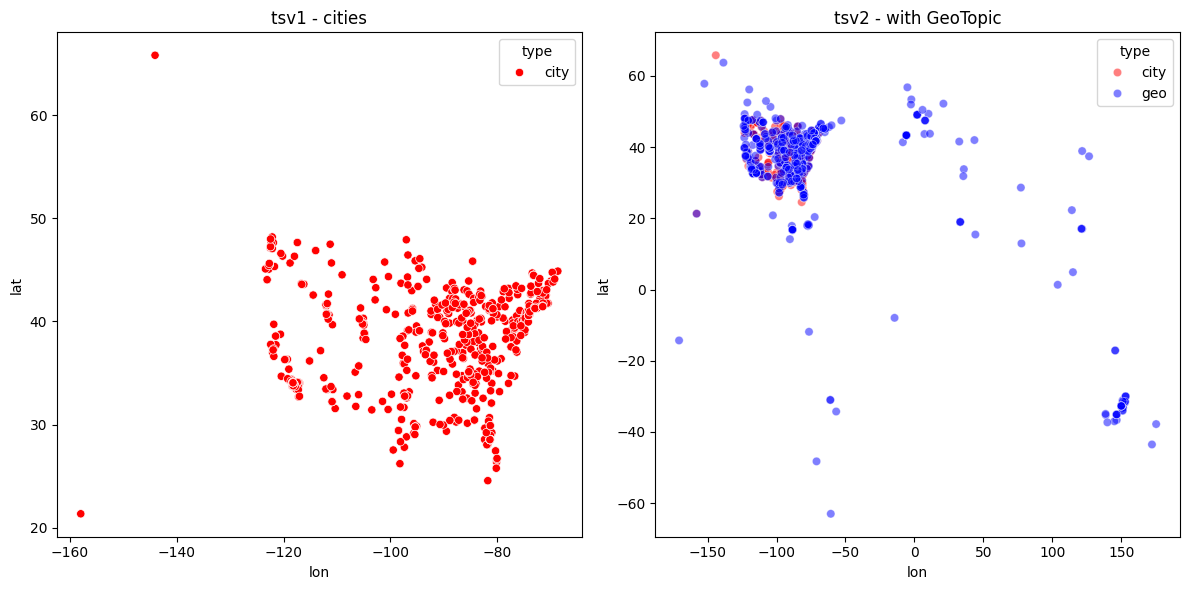

In [181]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

plot_df = tsv2_geo.dropna(subset=['geo_name','geo_lat','geo_lon'],how='all')
plot_df = plot_df[['city','city_longitude','city_latitude','geo_name','geo_lat','geo_lon']]
print(plot_df.shape)

# Reshape the data
city_df = plot_df[['city_longitude', 'city_latitude']].copy()
city_df.columns = ['lon', 'lat']
city_df['type'] = 'city'

geo_df = plot_df[['geo_lon', 'geo_lat']].copy()
geo_df.columns = ['lon', 'lat']
geo_df['type'] = 'geo'

combined_df = pd.concat([city_df, geo_df], ignore_index=True)

# Plot
## subplots
fig, axes = plt.subplots(1, 2, figsize=(12,6)) 
sb.scatterplot(data=city_df, x='lon', y='lat', hue='type', palette={'city':'red'}, ax=axes[0])
axes[0].set_title("tsv1 - cities")

sb.scatterplot(data=combined_df, x='lon', y='lat', hue='type', palette={'city': 'red', 'geo': 'blue'}, alpha=0.5, ax=axes[1])
axes[1].set_title("tsv2 - with GeoTopic")

plt.tight_layout()
plt.show()

In [182]:
# Remap the Apparition_Type into a few categories
tsv2_geo['Apparition_Type'].unique()

array(['Ghost', 'Unknown', 'Orb', 'Ghost, Orb', 'Ghost, Female, Child',
       'Ghost, Several Ghosts', 'Ghost, Male', 'Male', 'Female', 'UAP',
       'Ghost, Female', 'Several Ghosts', 'UFO', 'Ghost, UFO',
       'Ghost, Orb, Several Ghosts', 'Ghost, Male, Several Ghosts',
       'Orb, UAP', 'Orb, Male, Several Ghosts', 'Ghost, Child',
       'Orb, Male', 'Ghost, UAP', 'Ghost, Orb, Female'], dtype=object)

In [183]:
def appar_filter(x):
    if ('Ghost' in x or 'Orb' in x) and ('UAP' in x or 'UFO' in x):
        return 3 
    elif 'UAP' in x or 'UFO' in x:
        return 2 
    elif 'Orb' in x or 'Ghost' in x: 
        return 1  
    else:
        return 0 

tsv2_geo['Apparition_Type2'] = tsv2_geo['Apparition_Type'].map(lambda x: appar_filter(x))

(599, 7)


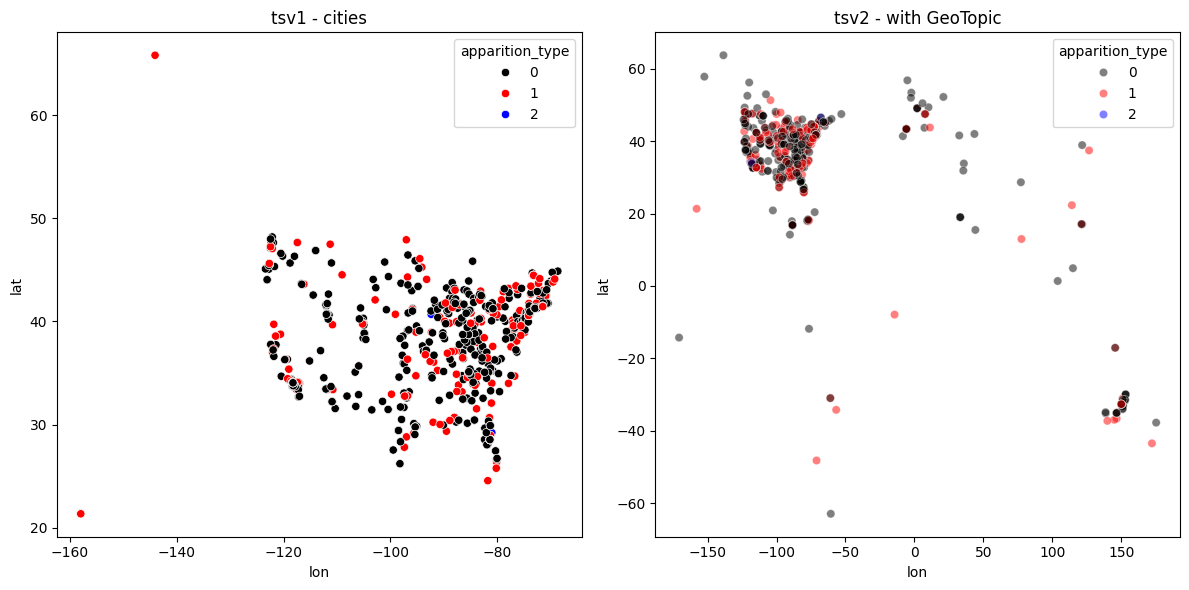

In [184]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

plot_df = tsv2_geo.dropna(subset=['geo_name','geo_lat','geo_lon'],how='all')
plot_df = plot_df[['city','city_longitude','city_latitude','geo_name','geo_lat','geo_lon','Apparition_Type2']]
print(plot_df.shape)

# Reshape the data
city_df2 = plot_df[['city_longitude', 'city_latitude','Apparition_Type2']].copy()
city_df2.columns = ['lon', 'lat','apparition_type']


geo_df2 = plot_df[['geo_lon', 'geo_lat','Apparition_Type2']].copy()
geo_df2.columns = ['lon', 'lat','apparition_type']

combined_df2 = pd.concat([city_df2, geo_df2], ignore_index=True)

# Plot
## subplots
fig, axes = plt.subplots(1, 2, figsize=(12,6)) 
sb.scatterplot(data=city_df2, x='lon', y='lat', hue='apparition_type', palette={0:'black',1:'red',2:'blue',3:'orange'}, ax=axes[0])
axes[0].set_title("tsv1 - cities")

sb.scatterplot(data=geo_df2, x='lon', y='lat', hue='apparition_type', palette={0:'black',1:'red',2:'blue',3:'orange'}, alpha=0.5, ax=axes[1])
axes[1].set_title("tsv2 - with GeoTopic")

plt.tight_layout()
plt.show()

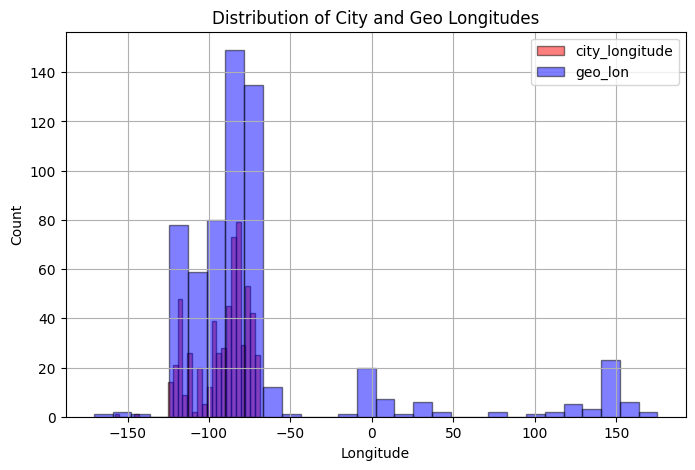

In [185]:
# Histogram of location alongside longitude(South to North)
plt.figure(figsize=(8, 5))
plt.hist(plot_df['city_longitude'], bins=30, alpha=0.5, label='city_longitude', color='red', edgecolor='black')
plt.hist(plot_df['geo_lon'], bins=30, alpha=0.5, label='geo_lon', color='blue', edgecolor='black')
plt.xlabel('Longitude')
plt.ylabel('Count')
plt.title('Distribution of City and Geo Longitudes')
plt.legend()
plt.grid(True)
plt.show()


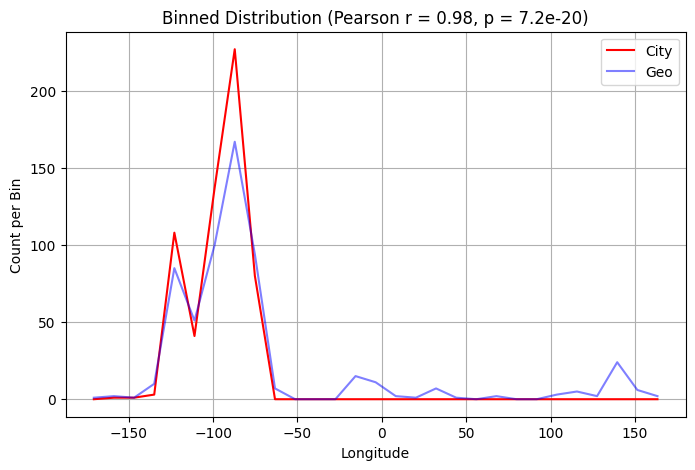

In [186]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# 1. Define bins
bins = np.linspace(min(plot_df[['city_longitude', 'geo_lon']].min()),
                   max(plot_df[['city_longitude', 'geo_lon']].max()), 30)

# 2. Histogram counts
city_hist, _ = np.histogram(plot_df['city_longitude'], bins=bins)
geo_hist, _ = np.histogram(plot_df['geo_lon'], bins=bins)

# 3. Compute correlation
corr, pval = pearsonr(city_hist, geo_hist)

# 4. (Optional) Plot both histograms
plt.figure(figsize=(8, 5))
plt.plot(bins[:-1], city_hist, label='City', color='red')
plt.plot(bins[:-1], geo_hist, label='Geo', color='blue',alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Count per Bin')
plt.title(f'Binned Distribution (Pearson r = {corr:.2f}, p = {pval:.2g})')
plt.legend()
plt.grid(True)
plt.show()


In [187]:
bins[2]-bins[3]

np.float64(-11.929913793103424)

In [188]:
# Define shared bins (e.g., 30 equally spaced bins across all longitudes)
def hist_stat_report(df, feature_1, feature_2, num_bins=30):
    bins = np.linspace(
        min(df[[feature_1, feature_2]].min()),
        max(df[[feature_1, feature_2]].max()),
        num_bins
    )

    # Histogram counts
    city_hist, _ = np.histogram(df[feature_1], bins=bins)
    geo_hist, _ = np.histogram(df[feature_2], bins=bins)

    # Bin centers (for interpretation)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Function to compute average, median, and most frequent bin center
    def histogram_stats(hist_counts, bin_centers):
        total = hist_counts.sum()
        # Weighted average
        avg = np.sum(hist_counts * bin_centers) / total
        # Cumulonive sum for median
        cum_counts = np.cumsum(hist_counts)
        median_bin_idx = np.searchsorted(cum_counts, total / 2)
        median = bin_centers[median_bin_idx]
        # Most frequent bin
        max_bin_idx = np.argmax(hist_counts)
        mode = bin_centers[max_bin_idx]
        return avg, median, mode

    # Get stats
    city_avg, city_median, city_mode = histogram_stats(city_hist, bin_centers)
    geo_avg, geo_median, geo_mode = histogram_stats(geo_hist, bin_centers)

    # Print nicely
    print(f"{feature_1} Stats:")
    print(f"  Average: {city_avg:.4f}")
    print(f"  Median:  {city_median:.4f}")
    print(f"  Mode:    {city_mode:.4f} (Most frequent bin center)")

    print(f"\n{feature_2} Stats:")
    print(f"  Average: {geo_avg:.4f}")
    print(f"  Median:  {geo_median:.4f}")
    print(f"  Mode:    {geo_mode:.4f} (Most frequent bin center)")


hist_stat_report(plot_df, 'city_longitude', 'geo_lon')

city_longitude Stats:
  Average: -90.9054
  Median:  -81.2098
  Mode:    -81.2098 (Most frequent bin center)

geo_lon Stats:
  Average: -67.8061
  Median:  -81.2098
  Mode:    -81.2098 (Most frequent bin center)


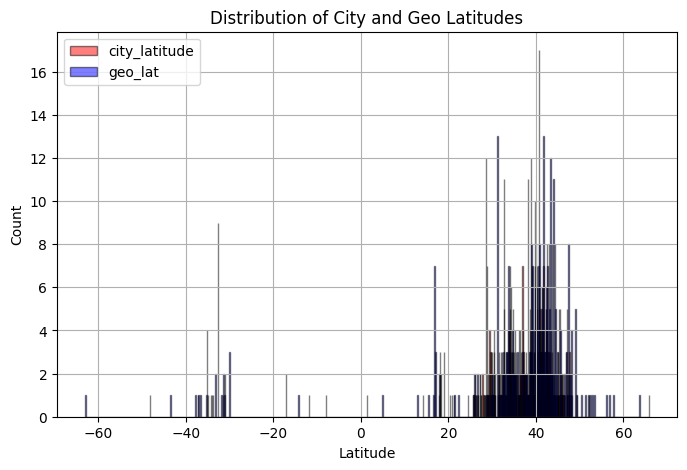

In [189]:
# Histogram of location alongside latitude
plt.figure(figsize=(8, 5))
plt.hist(plot_df['city_latitude'], bins=1180, alpha=0.5, label='city_latitude', color='red', edgecolor='black')
plt.hist(plot_df['geo_lat'].dropna(), bins=1180, alpha=0.5, label='geo_lat', color='blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Count')
plt.title('Distribution of City and Geo Latitudes')
plt.legend()
plt.grid(True)
plt.show()


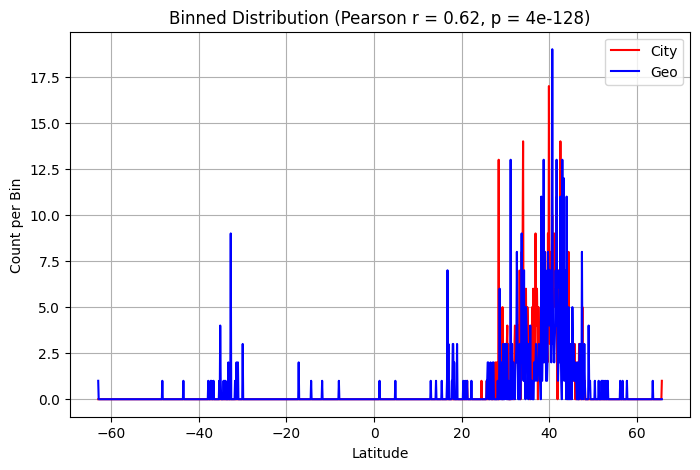

In [190]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# 1. Define bins
bins = np.linspace(min(plot_df[['city_latitude', 'geo_lat']].min()),
                   max(plot_df[['city_latitude', 'geo_lat']].max()), 1180)

# 2. Histogram counts
city_hist, _ = np.histogram(plot_df['city_latitude'], bins=bins)
geo_hist, _ = np.histogram(plot_df['geo_lat'], bins=bins)

# 3. Compute correlation
corr, pval = pearsonr(city_hist, geo_hist)

# 4. (Optional) Plot both histograms
plt.figure(figsize=(8, 5))
plt.plot(bins[:-1], city_hist, label='City', color='red')
plt.plot(bins[:-1], geo_hist, label='Geo', color='blue')
plt.xlabel('Latitude')
plt.ylabel('Count per Bin')
plt.title(f'Binned Distribution (Pearson r = {corr:.2f}, p = {pval:.2g})')
plt.legend()
plt.grid(True)
plt.show()


In [191]:
# 10km == 0.090 diff in latitude 
bins[0]- bins[1]

np.float64(-0.10925237964376322)

In [192]:
hist_stat_report(plot_df, 'city_latitude', 'geo_lat',1180)

city_latitude Stats:
  Average: 38.1310
  Median:  39.0041
  Mode:    39.9874 (Most frequent bin center)

geo_lat Stats:
  Average: 33.1114
  Median:  39.2226
  Mode:    40.7521 (Most frequent bin center)


### Quality check for the columns generated by GeoParser

In [193]:
# The number of records in tsv2
print(len(tsv2_geo))

# The number of records which has non-NA in the columns generated by GeoTopicParser
print(len(plot_df))

9743
599


In [194]:
filter_1 = (tsv2_geo['location']==tsv2_geo['geo_name'])
filter_2 = (tsv2_geo['longitude'].apply(lambda x: round(float(x),1))==tsv2_geo['geo_lon'].apply(lambda x: round(float(x),1)))&(tsv2_geo['latitude'].apply(lambda x: round(float(x),1))==tsv2_geo['geo_lat'].apply(lambda x: round(float(x),1)))
# The number of Exactly identical location names 
print(len(tsv2_geo[filter_1]))

# The number of Exactly identical location names & equal coordinates 
print(len(tsv2_geo[filter_1 & filter_2]))
tsv2_geo[filter_1] 

136
32


city        country  \
151       Garden City  United States   
196          Hastings  United States   
240   Mackinac Island  United States   
464         Allegheny  United States   
822      Philadelphia  United States   
...               ...            ...   
9413         Columbia  United States   
9648           Denver  United States   
9649           Denver  United States   
9690       Grand Lake  United States   
9730           Pueblo  United States   

                                            description  \
151   reports of an apparition on an old man that is...   
196   A lady is said to have been murdered in the ol...   
240   has its own ghosts. The children of the post c...   
464   Old Mill Rd. - Gravity Hill - At the stop sign...   
822   Bolton Mansion grounds - . While sledding in t...   
...                                                 ...   
9413  Artillery range -  a female soldier with a hol...   
9648  Red Rocks Amphitheater - Apparitions of an old...   
9649  Several problems were encountered while buildi...   
9690  Way back in the day, the Ute Indians were sudd...   
9730  Many people have died along the old trails bes...   

                          location           state state_abbrev   longitude  \
151               Garden City Park        Michigan           MI  -83.348889   
196                  Charlton Park        Michigan           MI  -85.211637   
240                  Fort Mackinac        Michigan           MI  -84.617398   
464                     North Park    Pennsylvania           PA  -80.017419   
822                 Fairless Hills    Pennsylvania           PA  -74.834615   
...                            ...             ...          ...         ...   
9413                  Fort Jackson  South Carolina           SC  -80.912817   
9648                 Denver County        Colorado           CO -104.990251   
9649  Denver International Airport        Colorado           CO -104.673738   
9690                    Grand Lake        Colorado           CO -105.823067   
9730                Arkansas River        Colorado           CO -104.609141   

       latitude  city_longitude  city_latitude  ... PRODUCT  \
151   42.312688      -83.331042      42.325593  ...      []   
196   42.616978      -85.290840      42.645868  ...      []   
240   45.852099      -84.618934      45.849180  ...      []   
464   40.610840      -80.008775      40.445081  ...      []   
822   40.188370      -75.165222      39.952584  ...      []   
...         ...             ...            ...  ...     ...   
9413  34.015507      -81.034814      34.000710  ...      []   
9648  39.739236     -104.990251      39.739236  ...      []   
9649  39.856096     -104.990251      39.739236  ...      []   
9690  40.252207     -105.823067      40.252207  ...      []   
9730  38.254447     -104.609141      38.254447  ...      []   

                     NORP  MONEY                EVENT                    TIME  \
151                    []     []                   []                      []   
196                    []     []                   []                      []   
240                    []     []  ['the "Black Hole']                      []   
464                    []     []                   []                      []   
822                    []     []                   []                      []   
...                   ...    ...                  ...                     ...   
9413                   []     []                   []                      []   
9648                   []     []                   []  ['just a few seconds']   
9649  ['Native American']     []                   []                      []   
9690          ['Indians']     []                   []      ['a stormy night']   
9730           ['Indian']     []                   []                      []   

                                           ORG            DATE  \
151                                         []              []   
196             

In [195]:
import numpy as np

# Step 1: Compute lat/lon degree threshold
km_range = 16
lat_km_per_deg = 111  # approximately constant
plot_df = tsv2_geo.dropna(subset=['geo_name','geo_lat','geo_lon'],how='all')
print("The number of non-NA GeoTopicParser records:", len(plot_df))

# Latitude difference (same for all rows)
lat_diff = km_range / lat_km_per_deg  # ≈ 0.0901

# Longitude difference (depends on latitude)
# Compute longitude difference per row
plot_df['lon_diff'] = km_range / (lat_km_per_deg * np.cos(np.radians(plot_df['city_latitude'])))

# Step 2: Compute boolean mask of points within 10 km square box
within_lat = np.abs(plot_df['geo_lat'] - plot_df['city_latitude']) <= lat_diff
within_lon = np.abs(plot_df['geo_lon'] - plot_df['city_longitude']) <= plot_df['lon_diff']
within_box = within_lat & within_lon

# Step 3: Keep only records **outside** the 10 km box
filtered_df = plot_df[within_box].copy()
print(f"The number of records that geoparsed location is within {km_range}km square from the city coordinates:",len(filtered_df))
filtered_df 

The number of non-NA GeoTopicParser records: 599
The number of records that geoparsed location is within 16km square from the city coordinates: 93


/tmp/ipykernel_127488/945165472.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['lon_diff'] = km_range / (lat_km_per_deg * np.cos(np.radians(plot_df['city_latitude'])))


city        country  \
240    Mackinac Island  United States   
382     South Rockwood  United States   
491           Bensalem  United States   
824       Philadelphia  United States   
1025       Santa Paula  United States   
...                ...            ...   
9540          Cranston  United States   
9621  Colorado Springs  United States   
9648            Denver  United States   
9660            Denver  United States   
9690        Grand Lake  United States   

                                            description  \
240   has its own ghosts. The children of the post c...   
382   Story goes. if you go late at night between 11...   
491   The electronics stockroom is rumored to be hau...   
824   Three ghosts are here. A women in the ruins of...   
1025  employees report feeling uneasy in the theatre...   
...                                                 ...   
9540  Guards have reported seeing a man jump off the...   
9621  Helen Hunt falls - The falls now bear her name...   
9648  Red Rocks Amphitheater - Apparitions of an old...   
9660  Mary Reed Building  It was the Dupont Room, na...   
9690  Way back in the day, the Ute Indians were sudd...   

                                               location         state  \
240                                       Fort Mackinac      Michigan   
382                                S. Rockwood cemetery      Michigan   
491                                    Target Neshaminy  Pennsylvania   
824                                        Fort Mifflin  Pennsylvania   
1025  Wallace Theatres / Santa Paula 7 theaters Thea...    California   
...                                                 ...           ...   
9540                                Rhode Island Prison  Rhode Island   
9621                                    Cheyenne Canyon      Colorado   
9648                                      Denver County      Colorado   
9660                               University of Denver      Colorado   
9690                                         Grand Lake      Colorado   

     state_abbrev   longitude   latitude  city_longitude  city_latitude  ...  \
240            MI  -84.617398  45.852099      -84.618934      45.849180  ...   
382            MI  -83.271698  42.062233      -83.261041      42.063932  ...   
491            PA  -74.962207  40.135508      -74.932568      40.099442  ...   
824            PA  -75.213196  39.875175      -75.165222      39.952584  ...   
1025           CA -119.081742  34.346478     -119.059270      34.354166  ...   
...           ...         ...        ...             ...            ...  ...   
9540           RI  -71.463887  41.748781      -71.437280      41.779823  ...   
9621           CO -104.885825  38.792219     -104.821363      38.833882  ...   
9648           CO -104.990251  39.739236     -104.990251      39.739236  ...   
9660           CO -104.961896  39.676617     -104.990251      39.739236  ...   
9690           CO -105.823067  40.252207     -105.823067      40.252207  ...   

             NORP  MONEY                EVENT                      TIME  \
240            []     []  ['the "Black Hole']                        []   
382            []     []                   []  ['late at night', '3am']   
491    ['indian']     []                   []                        []   
824            []     []                   []                        []   
1025           []     []                   []                        []   
...           ...    ...                  ...                       ...   
9540           []     []                   []                        []   
9621           []     []                   []                        []   
9648           []     []                   []    ['just a few seconds']   
9660           []     []                   []                        []   
9690  ['Indians']     []                   []        ['a stormy night']   

                                           ORG           DATE  QUANTITY  \
24

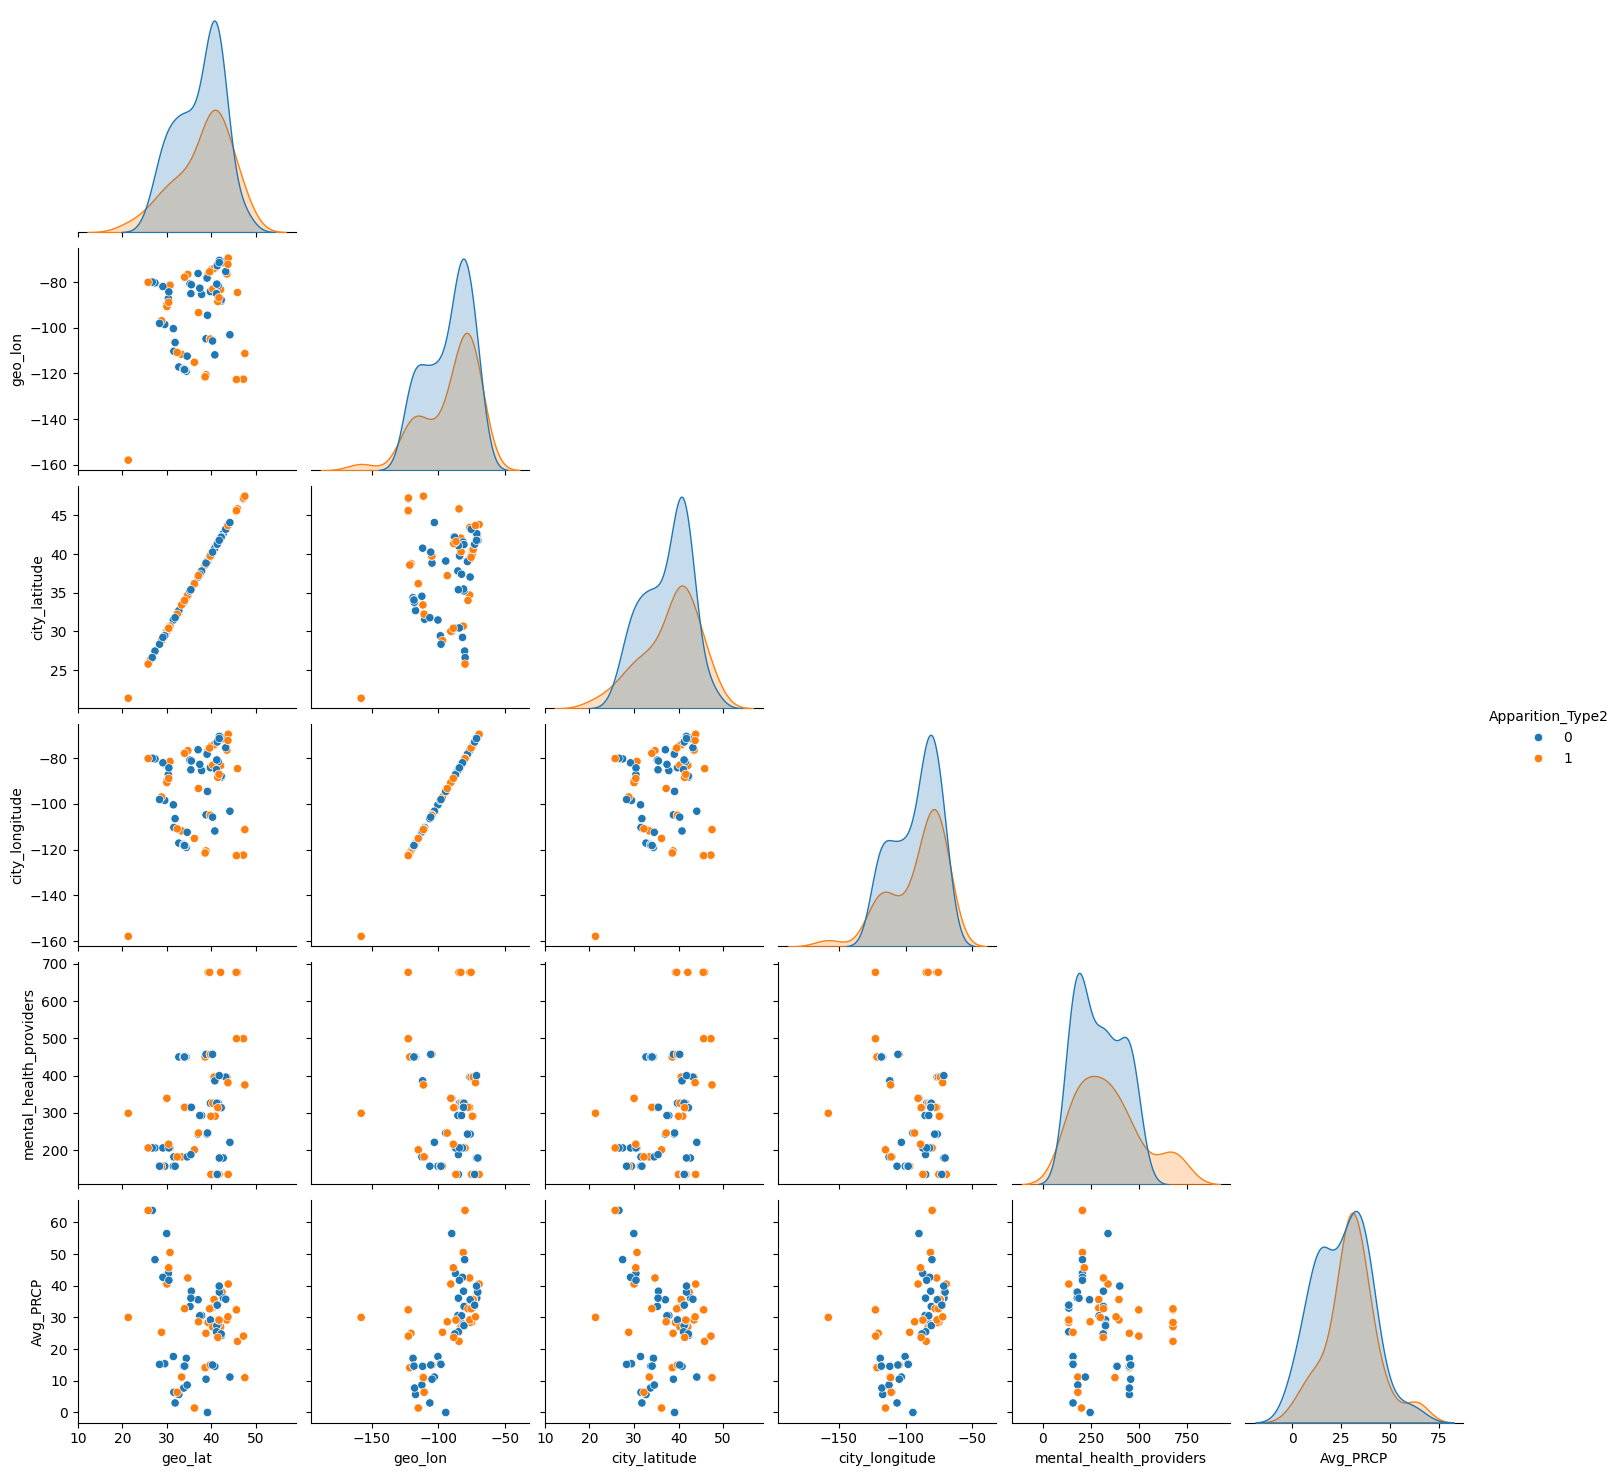

In [200]:
#target_features = ['Apparition_Type2','geo_lat','geo_lon','city_latitude','city_longitude','mental_health_providers', 'Avg_PRCP']
#sb.pairplot(filtered_df[target_features],corner=True)
target_features = ['Apparition_Type2','geo_lat','geo_lon','city_latitude','city_longitude','mental_health_providers', 'Avg_PRCP']
sb.pairplot(filtered_df[target_features],corner=True,hue='Apparition_Type2') 

## Part 2.

## Part 3. 

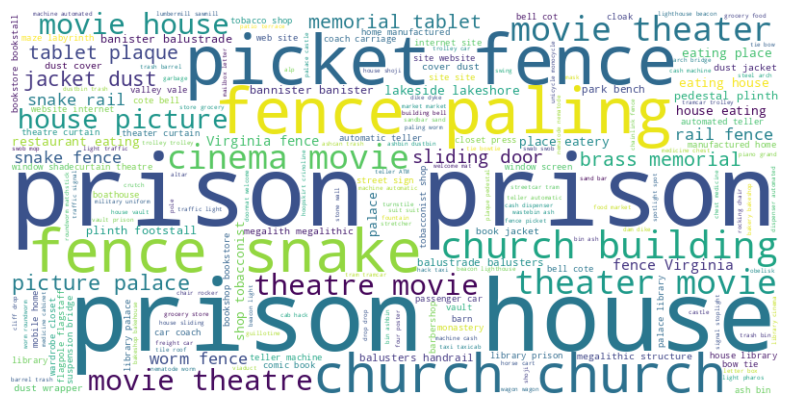

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
input_csv = "../data/arcgis_img_captions_objects_final2.tsv"
df = pd.read_csv(input_csv, sep='\t')
all_objects = []
for objects in df["objects"].dropna():
    # Split the comma-separated string and strip whitespace.
    labels = [label.strip() for label in objects.split(",")]
    all_objects.extend(labels)
# Create a single string of all object labels.
text = " ".join(all_objects)
# Generate the word cloud.
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
# Display the generated image.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Part 4. 

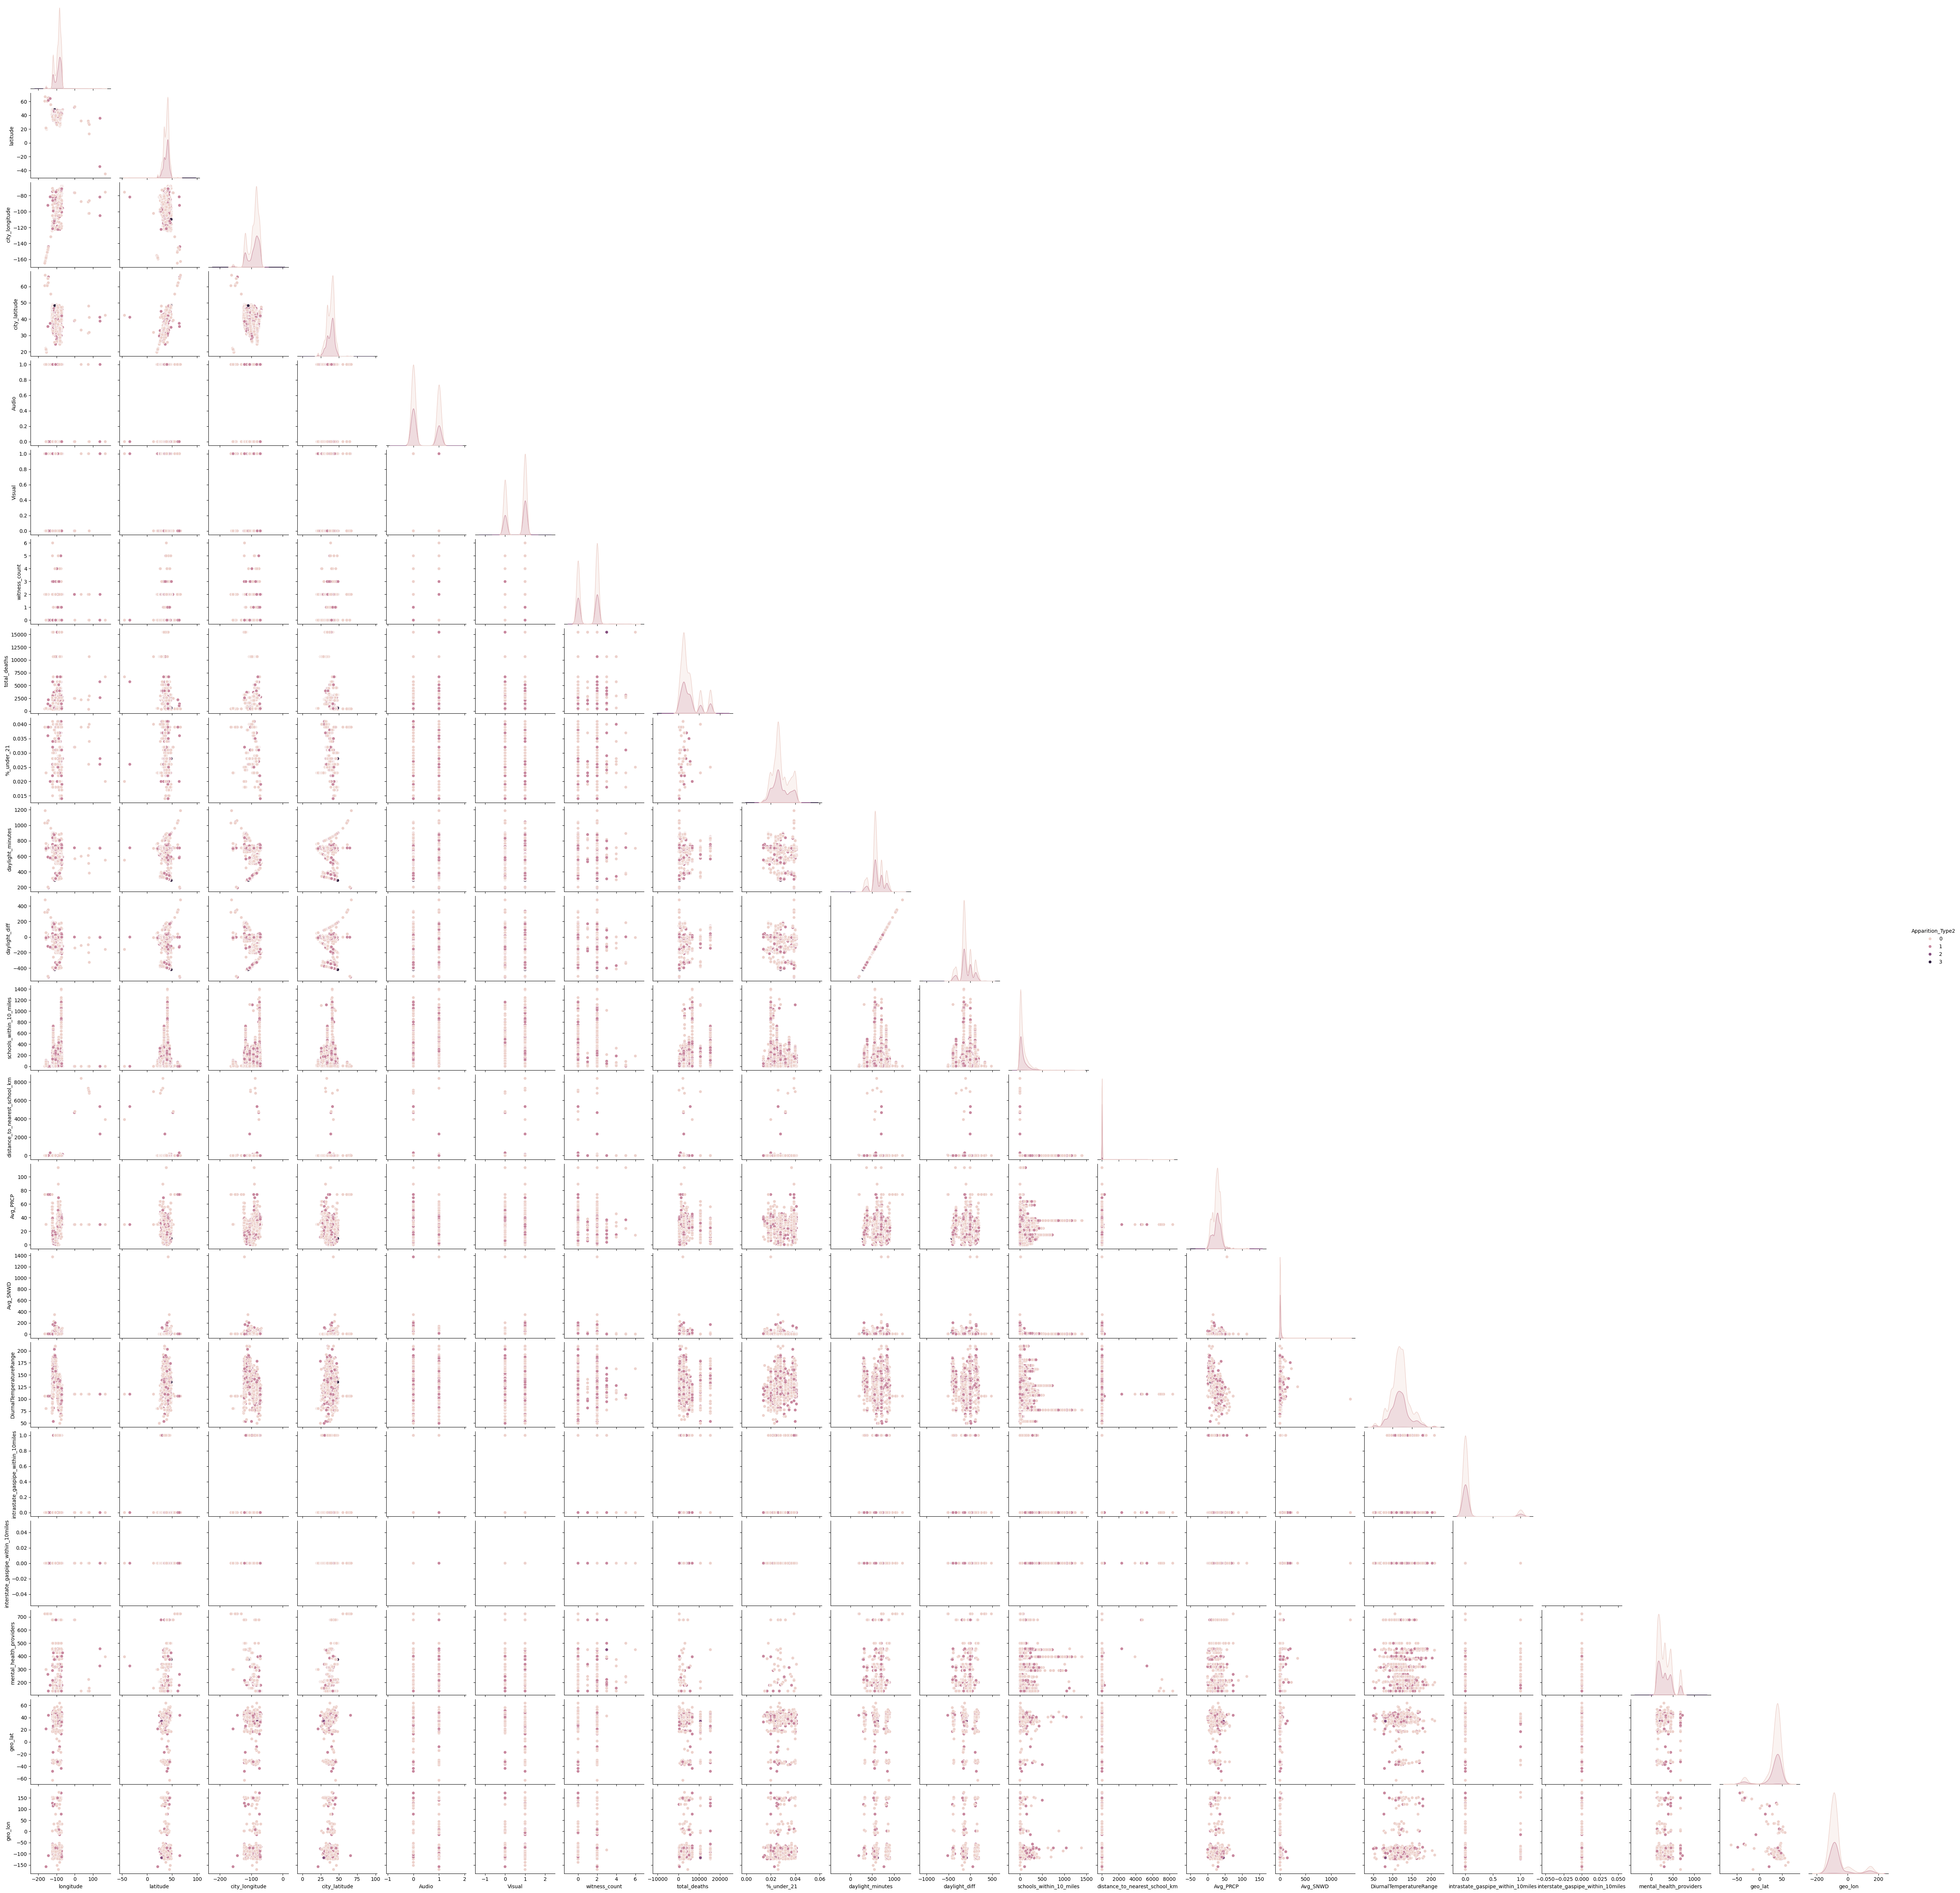

In [203]:
import seaborn as sb 
import pandas as pd 
import matplotlib.pyplot as plt 

#sb.pairplot(filtered_df,corner=True,kind='kde')  
tsv2_geo['Apparition_Type2'] = tsv2_geo['Apparition_Type'].map(lambda x: appar_filter(x))
sb.pairplot(tsv2_geo, corner=True, hue='Apparition_Type2')
